<a href="https://colab.research.google.com/github/udz2002/applied-data-science/blob/main/ADS1_Tutorial_6_Fitting_Hands_On_Exercises_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting in Data Science — Tutorial 6
This notebook includes:
- Linear regression
- Non-linear (exponential) fitting
- Polynomial fitting (NumPy, SciPy, scikit-learn variants)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def r2_score_manual(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("Libraries ready.")

Libraries ready.


## 1) Linear Regression

Line: y = -25.000 x + 116.667
R^2: 0.9868


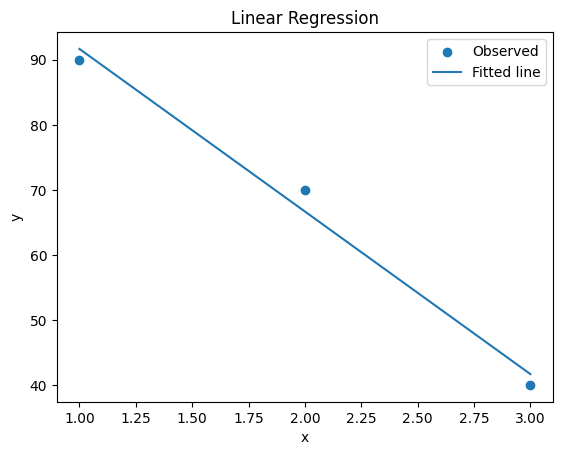

Residuals: [-1.66666667  3.33333333 -1.66666667]


In [2]:
x = np.array([1, 2, 3], dtype=float)
y = np.array([90, 70, 40], dtype=float)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
y_pred = slope * x + intercept
print(f"Line: y = {slope:.3f} x + {intercept:.3f}")
print(f"R^2: {r_value**2:.4f}")
plt.figure(); plt.scatter(x, y, label="Observed"); plt.plot(x, y_pred, label="Fitted line")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Linear Regression"); plt.legend(); plt.show()
print("Residuals:", y - y_pred)

## 2) Non-linear (Exponential) Fitting

Fitted: y = 2.076 * exp(0.490 * x)
R^2: 0.9975


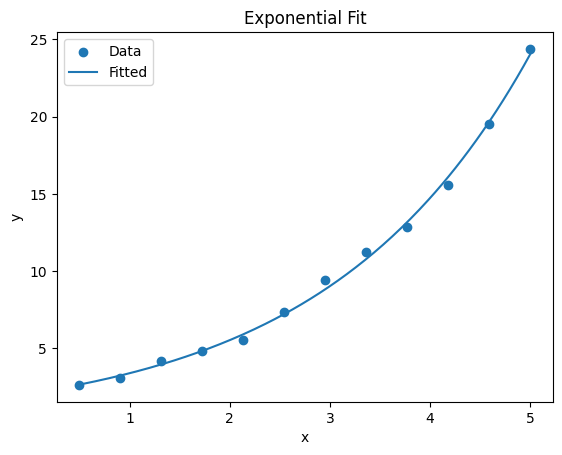

In [3]:
rng = np.random.default_rng(0)
x_exp = np.linspace(0.5, 5, 12)
true_a, true_b = 2.0, 0.5
y_exp = true_a * np.exp(true_b * x_exp) + rng.normal(0, 0.5, size=x_exp.size)

def exp_func(x, a, b): return a * np.exp(b * x)

popt, pcov = curve_fit(exp_func, x_exp, y_exp, p0=(1.0, 0.1), maxfev=10000)
a_fit, b_fit = popt
y_pred = exp_func(x_exp, *popt)
print(f"Fitted: y = {a_fit:.3f} * exp({b_fit:.3f} * x)")
print("R^2:", round(r2_score(y_exp, y_pred), 4))
x_fit = np.linspace(x_exp.min(), x_exp.max(), 200)
plt.figure(); plt.scatter(x_exp, y_exp, label="Data"); plt.plot(x_fit, exp_func(x_fit, *popt), label="Fitted")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Exponential Fit"); plt.legend(); plt.show()

## 3) Polynomial Fitting — NumPy (`polyfit` + `poly1d`)

NumPy coeffs (high->low): [-0.41492896  2.05154276  0.50024659]
NumPy R^2: 0.9707


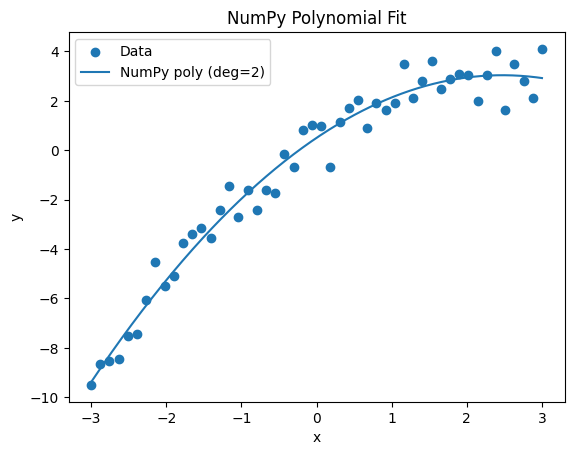

In [4]:
rng = np.random.default_rng(7)
x_poly = np.linspace(-3, 3, 50)
y_true = 1.0 + 2.0*x_poly - 0.5*x_poly**2
y_poly = y_true + rng.normal(0, 0.8, size=x_poly.size)

deg = 2  # try 1,2,3...
coeffs = np.polyfit(x_poly, y_poly, deg)
p = np.poly1d(coeffs)
y_hat = p(x_poly)
r2_np = r2_score_manual(y_poly, y_hat)
print("NumPy coeffs (high->low):", coeffs)
print("NumPy R^2:", round(r2_np, 4))
x_s = np.linspace(x_poly.min(), x_poly.max(), 400)
plt.figure(); plt.scatter(x_poly, y_poly, label="Data"); plt.plot(x_s, p(x_s), label=f"NumPy poly (deg={deg})")
plt.xlabel("x"); plt.ylabel("y"); plt.title("NumPy Polynomial Fit"); plt.legend(); plt.show()

## 4) Polynomial Fitting — SciPy (`curve_fit`)

SciPy params [a0,a1,a2]: [ 0.5002  2.0515 -0.4149]
SciPy R^2: 0.9707


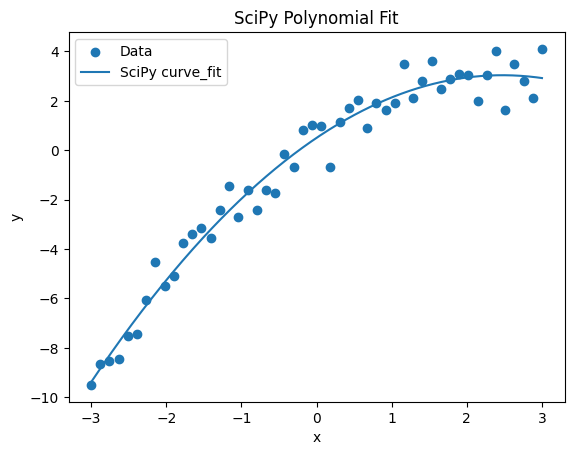

In [5]:
def quad(x, a0, a1, a2): return a0 + a1*x + a2*x**2
popt, pcov = curve_fit(quad, x_poly, y_poly, p0=(0.0, 0.0, 0.0), maxfev=10000)
y_hat_cf = quad(x_poly, *popt)
print("SciPy params [a0,a1,a2]:", np.round(popt, 4))
print("SciPy R^2:", round(r2_score(y_poly, y_hat_cf), 4))
x_s = np.linspace(x_poly.min(), x_poly.max(), 400)
plt.figure(); plt.scatter(x_poly, y_poly, label="Data"); plt.plot(x_s, quad(x_s, *popt), label="SciPy curve_fit")
plt.xlabel("x"); plt.ylabel("y"); plt.title("SciPy Polynomial Fit"); plt.legend(); plt.show()

## 5) Polynomial Fitting — scikit-learn (`PolynomialFeatures` + `LinearRegression`)

sklearn intercept: 0.5002
sklearn coeffs: [ 0.      2.0515 -0.4149]
sklearn R^2: 0.9707


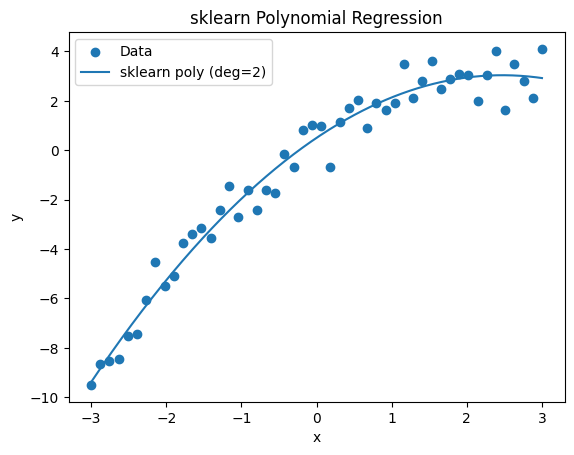

In [6]:
X = x_poly.reshape(-1, 1)
deg_skl = 2
poly = PolynomialFeatures(degree=deg_skl, include_bias=True)
X_poly = poly.fit_transform(X)
lr = LinearRegression().fit(X_poly, y_poly)
y_hat_skl = lr.predict(X_poly)
print("sklearn intercept:", round(lr.intercept_, 4))
print("sklearn coeffs:", np.round(lr.coef_, 4))
print("sklearn R^2:", round(r2_score(y_poly, y_hat_skl), 4))

x_s = np.linspace(x_poly.min(), x_poly.max(), 400).reshape(-1,1)
y_s = lr.predict(poly.transform(x_s))
plt.figure(); plt.scatter(X, y_poly, label="Data"); plt.plot(x_s, y_s, label=f"sklearn poly (deg={deg_skl})")
plt.xlabel("x"); plt.ylabel("y"); plt.title("sklearn Polynomial Regression"); plt.legend(); plt.show()

##6)Variable Polynomial Fitting (Degree 2)
Fit a polynomial surface with two predictors (e.g., Size and Distance) to predict a target (e.g., Price).
Steps:

Generate or upload data
Fit degree‑2 polynomial using scikit‑learn
Evaluate with train/test R²
Plot 3D scatter and fitted surface

1) Data: Use synthetic or upload CSV
Synthetic data mimics: Price = f(Size, Distance) with noise.
To upload CSV in Colab (columns: size, distance, price), run the upload cell and set use_uploaded=True.

In [7]:
# Synthetic data
rng = np.random.default_rng(7)
n = 300
size = rng.uniform(30, 200, n)   # x1
dist = rng.uniform(0, 25, n)     # x2
price_true = 50000 + 2000*size - 5000*dist + 3*size*dist - 5*(dist**2)
price = price_true + rng.normal(0, 20000, n)

X_synth = np.column_stack([size, dist])
y_synth = price

 2) Fit degree‑2 polynomial
We expand features to \([1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]\) and fit a linear model.


In [8]:
# Import in other necessary libraries for plotting
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print("Libraries ready.")

Libraries ready.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_synth, y_synth, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=True)
Xtr = poly.fit_transform(X_train)
Xte = poly.transform(X_test)

model = LinearRegression().fit(Xtr, y_train)

y_pred_tr = model.predict(Xtr)
y_pred_te = model.predict(Xte)

print("R^2 train:", round(r2_score(y_train, y_pred_tr), 3))
print("R^2 test :", round(r2_score(y_test, y_pred_te), 3))

names = poly.get_feature_names_out(['size','dist'])
print("Features:", names)
print("Intercept:", model.intercept_)
print("Coefs (excluding bias):", model.coef_[1:])

R^2 train: 0.967
R^2 test : 0.968
Features: ['1' 'size' 'dist' 'size^2' 'size dist' 'dist^2']
Intercept: 47222.17066591358
Coefs (excluding bias): [ 2.00492645e+03 -4.71017643e+03  4.03819593e-02  4.34423612e-01
 -2.52336257e+00]


3) Visualize 3D scatter + fitted surface
One plot for clarity; Matplotlib default colors are used.


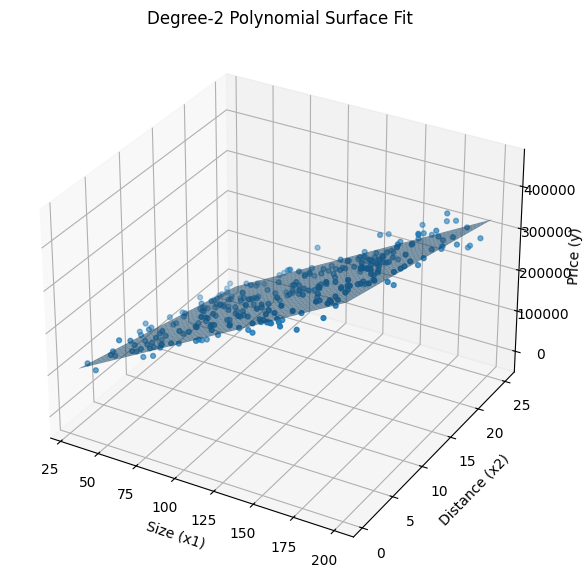

In [12]:
# Build grid for surface
s_min, s_max = X_synth[:,0].min(), X_synth[:,0].max()
d_min, d_max = X_synth[:,1].min(), X_synth[:,1].max()
S, D = np.meshgrid(np.linspace(s_min, s_max, 40),
                   np.linspace(d_min, d_max, 40))
Xg = np.column_stack([S.ravel(), D.ravel()])
Z = model.predict(poly.transform(Xg)).reshape(S.shape)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
# Scatter
idx = np.random.choice(len(X_synth), size=min(1000, len(X_synth)), replace=False)
ax.scatter(X_synth[idx,0], X_synth[idx,1], y_synth[idx], s=12, marker='o')
# Surface
ax.plot_surface(S, D, Z, alpha=0.6)
ax.set_xlabel('Size (x1)')
ax.set_ylabel('Distance (x2)')
ax.set_zlabel('Price (y)')
ax.set_title('Degree‑2 Polynomial Surface Fit')
plt.show()

## ✍️Try out
1. Change polynomial degree and compare **R²** across all three methods.
2. Increase noise and observe robustness.
3. Add a **train/test split** and report **test R²** for NumPy and scikit-learn fits.



# Exercise 1
Download the 'india_population.csv" dataset.Determine a fit to the population in the `india_population.csv` file. You should start by plotting the population.

What type of fit have you selected?

In [13]:
#Load and inspect the data
import pandas as pd
df = pd.read_csv('india_population.csv')
df.head()

,date,Population,Annual % Change
0,1950,376325200,NaN
1,1951,382376948,1.61
2,1952,388799073,1.68
3,1953,395544369,1.73
4,1954,402578596,1.78


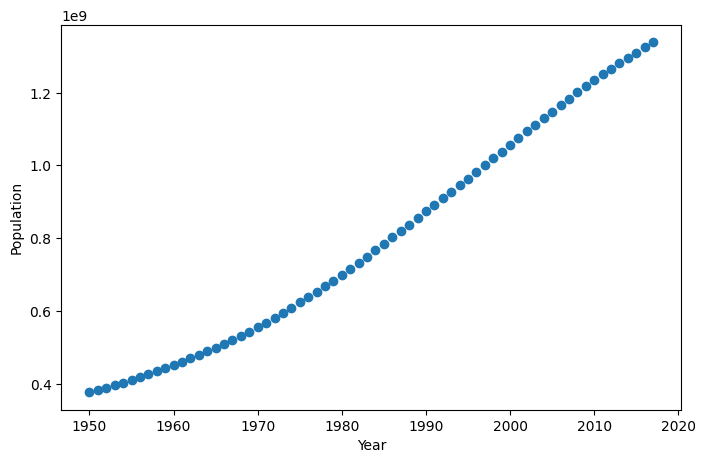

In [21]:
#visualise the data
plt.figure(figsize=(8,5))
plt.scatter(df['date'],df['Population'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [ ]:
#Selecting a Fit Type
#The population rise slowly increases over time.
# I will use  Polynomial fit to check.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('india_population.csv')

#Load the data
data = pd.read_csv('india_population.csv')
X = data['date'].values
y = data['Population'].values

#Polynomial degree
deg = 3
coeffs = np.polyfit(X, y, deg)
p = np.poly1d(coeffs)

# Predictions
y_hat = p(X)

# R-squared
r2_np = r2_score(y, y_hat)

#Results
print(f"Polynomial degree: {deg}")
print("NumPy coeffs (high->low):", np.round(coeffs, 6))
print("Numpy R^2:", round(r2_np, 4))
print("equation:\n", p)

Polynomial degree: 3
NumPy coeffs (high->low): [-2.27951290e+03  1.36575378e+07 -2.72579010e+10  1.81228084e+13]
Numpy R^2: 0.9999
equation:
        3             2
-2280 x + 1.366e+07 x - 2.726e+10 x + 1.812e+13


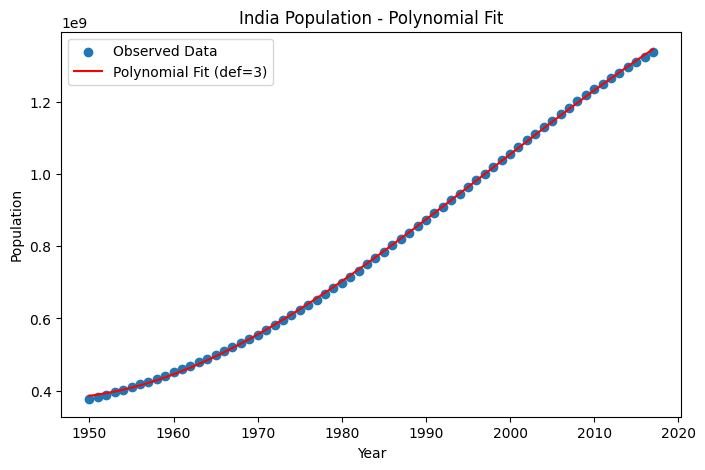

In [32]:
#plotting
x_s = np.linspace(X.min(), X.max(), 400)
plt.figure(figsize=(8,5));
plt.scatter(x, y, label="Observed Data")
plt.plot(x_s, p(x_s), color="red", label=f"Polynomial Fit (def={deg})")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("India Population - Polynomial Fit")
plt.legend()
plt.show()